In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

import world_model
import planning_cases

sns.set(style="whitegrid")
sns.set_context(context="paper")

In [2]:
result = pd.read_parquet("data/acc_reinf_10_experiment_full.parquet", engine="pyarrow")
print(result.describe())
print(result.info())
print(result.head())
#print(result["i"].unique())
result.tail()

               step         reinf     acc_reinf  cumsum_reinf
count  24800.000000  24800.000000  24800.000000  24800.000000
mean      49.500000     -6.144656   -614.465596   -297.674912
std       28.866652      3.187373    209.925893    219.921664
min        0.000000    -15.983891   -913.198434   -913.198434
25%       24.750000     -8.453756   -749.641973   -471.591253
50%       49.500000     -6.877798   -688.664935   -278.073727
75%       74.250000     -4.077563   -576.548569   -112.415972
max       99.000000      0.000000     -1.097287      0.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24800 entries, 0 to 24799
Data columns (total 5 columns):
step            24800 non-null int64
reinf           24800 non-null float64
strategy        24800 non-null object
acc_reinf       24800 non-null float64
cumsum_reinf    24800 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB
None
   step     reinf strategy   acc_reinf  cumsum_reinf
0     0  0.000000     

,step,reinf,strategy,acc_reinf,cumsum_reinf
24795,95,-8.022108,random,-781.409773,-755.325372
24796,96,-7.327286,random,-781.409773,-762.652659
24797,97,-6.759387,random,-781.409773,-769.412046
24798,98,-6.197788,random,-781.409773,-775.609834
24799,99,-5.799939,random,-781.409773,-781.409773


In [3]:
df = result.copy(deep=True)
df_gb = df.groupby(by=["step", "strategy"])["acc_reinf"].aggregate([np.mean, np.var, np.std])
df_gb

mean           var         std
step strategy                                      
0    first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
1    first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
2    first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
3    first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
4    first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
5    first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
6    first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
7    first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
...                   ...           ...         ...
92   none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
93   first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
94   first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
95   first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
96   first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
97   first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
98   first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786
99   first    -573.788018  45020.458009  212.180249
     last     -686.737011  26312.005430  162.209758
     none     -577.536966  74915.937765  273.707760
     random   -619.800387  24504.078289  156.537786

[400 rows x 3 columns]

In [4]:
mean_acc_reinf_df = df_gb.loc[0]
mean_acc_reinf_df

,mean,var,std
strategy,,,
first,-573.788018,45020.458009,212.180249
last,-686.737011,26312.005430,162.209758
none,-577.536966,74915.937765,273.707760
random,-619.800387,24504.078289,156.537786


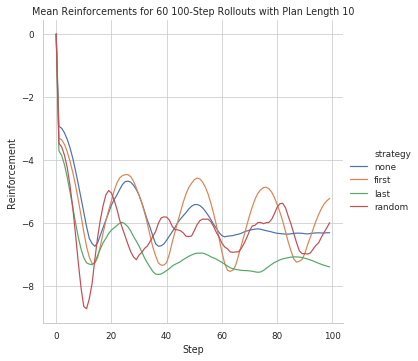

In [19]:
g = sns.relplot(
    x="step",
    y="reinf",
    hue="strategy",
    #row="strategy",
    kind="line",
    ci=None,
    data=df,
)
g.set(title="Mean Reinforcements for 60 100-Step Rollouts with Plan Length 10", ylabel="Reinforcement", xlabel="Step")


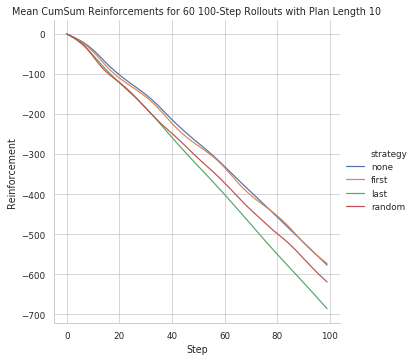

In [20]:
g1 = sns.relplot(
    x="step",
    y="cumsum_reinf",
    hue="strategy",
    #row="strategy",
    kind="line",
    ci=None,
    data=df,
)
g1.set(title="Mean CumSum Reinforcements for 60 100-Step Rollouts with Plan Length 10", ylabel="Reinforcement", xlabel="Step")


In [21]:
g.fig.savefig("graphics/acc_reinf_exp10_reinfs.svg")
g1.fig.savefig("graphics/acc_reinf_exp10_cumsum.svg")